In [1]:
import pandas as pd

In [2]:
df = pd. read_csv('Churn_Modelling.csv')

#in this sample we are analysing when bank customer leave the bank depending on what fators

In [3]:
df .columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
y = df["Exited"]

In [5]:
X = df[[ 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [6]:
geo = df["Geography"] 

In [7]:
geo = pd.get_dummies(geo , drop_first=True)

In [8]:
geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
gender = df["Gender"]

In [10]:
gender = pd.get_dummies(gender, drop_first=True)


In [11]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [12]:
X = pd.concat([X, gender , geo], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Male             10000 non-null  uint8  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [18]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense

model.add(Dense(units= 6 , input_dim = 11, activation= "relu"))  

#number of dense =  number of hidden layers
#units = number of neurons in that hidden layer
#input_dim number of inputs ie number of columns in X
#activation function to keep values in 0 and 1

model.add(Dense(units= 6 , activation= "relu")) 

model.add(Dense(units= 8 , activation= "relu")) 

#output layer ie y output only one neuron

model.add(Dense(units = 1 , activation = 'sigmoid'))

from keras.optimizers import Adam

model.compile(optimizer= Adam(learning_rate=0.000001), loss= "binary_crossentropy")

#loss for back propagation step

model.fit( X_train, y_train , epochs = 50 )



#we want loss to get minimized

df_loss = pd.DataFrame(model.history.history)

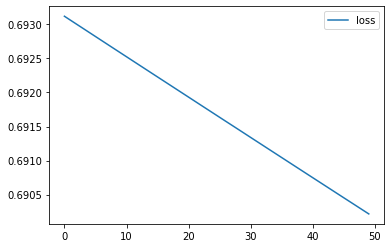

In [38]:
df_loss.plot()

In [40]:
 model.get_weights()

[array([[ 0.54915774,  0.37617666,  0.4629667 , -0.40478516, -0.43798926,
         -0.04052483],
        [ 0.4520969 ,  0.22694597,  0.5396166 ,  0.300888  ,  0.09707625,
         -0.5747515 ],
        [ 0.5760182 , -0.4212219 ,  0.34732416,  0.4042156 , -0.2609298 ,
         -0.09374393],
        [-0.26284263, -0.30511686, -0.18172282,  0.26175758,  0.3189911 ,
          0.10637744],
        [ 0.2833688 ,  0.30831584, -0.3589707 ,  0.20379451,  0.28586307,
          0.5872615 ],
        [ 0.21102877, -0.36656737,  0.01760872,  0.26718053, -0.6010454 ,
          0.03496215],
        [-0.58790445,  0.44638067, -0.24813123,  0.16728027,  0.39111668,
         -0.10798404],
        [ 0.3349496 , -0.17828362, -0.16614956, -0.1375829 ,  0.38101628,
         -0.00482375],
        [-0.26281294,  0.31866562,  0.4891984 , -0.32385382,  0.16239132,
          0.27290696],
        [-0.30871025,  0.36333406, -0.27168417, -0.14167783, -0.40331864,
          0.49288714],
        [ 0.09027027, -0.10943

In [41]:
y_pred=model.predict(X_test)

In [42]:
from sklearn import metrics


In [46]:
print ("train set accuracy", metrics.accuracy_score(y_train, model.predict(X_train).round(), normalize= False))

train set accuracy 5306


In [47]:
print ("test set accuracy", metrics.accuracy_score(y_test, y_pred.round(), normalize= False))

test set accuracy 2657
